In [1]:
# load packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import os
import random
from random import seed

In [2]:
# Loading data

games = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/games.csv")
players = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/players.csv")
plays = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/plays.csv")
tackles = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tackles.csv")
week2 = pd.read_csv("/Users/cyn/Desktop/nfl-big-data-bowl-2024/tracking_week_2.csv")

In [3]:
# Merging Data to get dataset

dataset = week2.merge(players, on = ['nflId', 'displayName'], how = 'outer').merge(games, on = 'gameId' , how = 'outer').merge(tackles, on = ['gameId', 'nflId', 'playId'] , how = 'outer').merge(plays, left_on = ['gameId', 'playId', 'nflId'], right_on = ['gameId', 'playId', 'ballCarrierId'] , how = 'inner')

# Information about Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59632 entries, 0 to 59631
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            59632 non-null  float64
 1   playId                            59632 non-null  float64
 2   nflId                             59632 non-null  float64
 3   displayName                       59632 non-null  object 
 4   frameId                           59632 non-null  float64
 5   time                              59632 non-null  object 
 6   jerseyNumber                      59632 non-null  float64
 7   club                              59632 non-null  object 
 8   playDirection                     59632 non-null  object 
 9   x                                 59632 non-null  float64
 10  y                                 59632 non-null  float64
 11  s                                 59632 non-null  float64
 12  a   

# New Binary Column - Foul

In [5]:
dataset['Foul'] = np.empty(len(dataset))
for i in range(len(dataset)):
    if pd.isna(dataset.foulNFLId1[i]) and pd.isna(dataset.foulNFLId2[i]):
        dataset.Foul[i] = 0
    else:
        dataset.Foul[i] = 1

/var/folders/1v/cty37wrs42196x0dzbz8j4jw0000gn/T/ipykernel_16009/1847695133.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Foul[i] = 0
/var/folders/1v/cty37wrs42196x0dzbz8j4jw0000gn/T/ipykernel_16009/1847695133.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.Foul[i] = 1


In [6]:
dataset = dataset.drop(axis = 1, columns = ['foulNFLId1', 'foulNFLId2']) #check column name or axis

## Sampling Out Data

In [7]:
seed(47)
df = dataset.sample(500)

# Exploring data

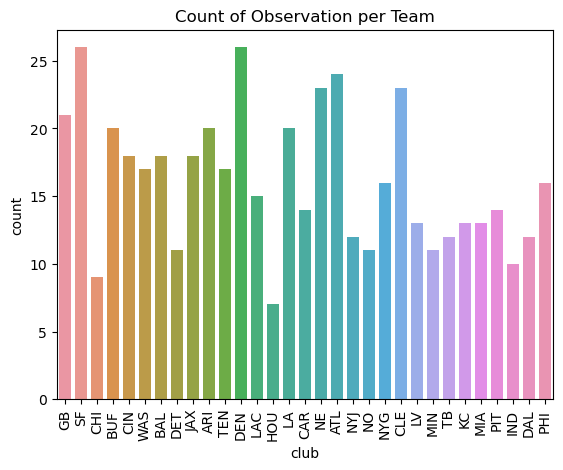

In [9]:
sns.countplot(data = df, x = 'club')
plt.xticks(rotation=90)
plt.title('Count of Observation per Team')
plt.show()

### Plots Using expectedPointsAdded as y variable

/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:354

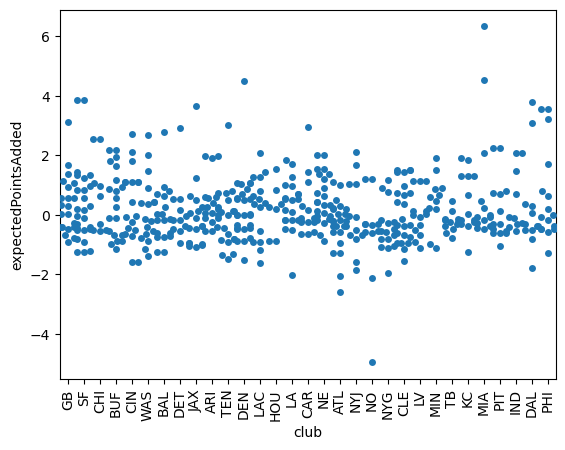

In [13]:
sns.swarmplot(data = df, x = 'club' , y = 'expectedPointsAdded')
plt.xticks(rotation=90)
plt.show()

/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:354

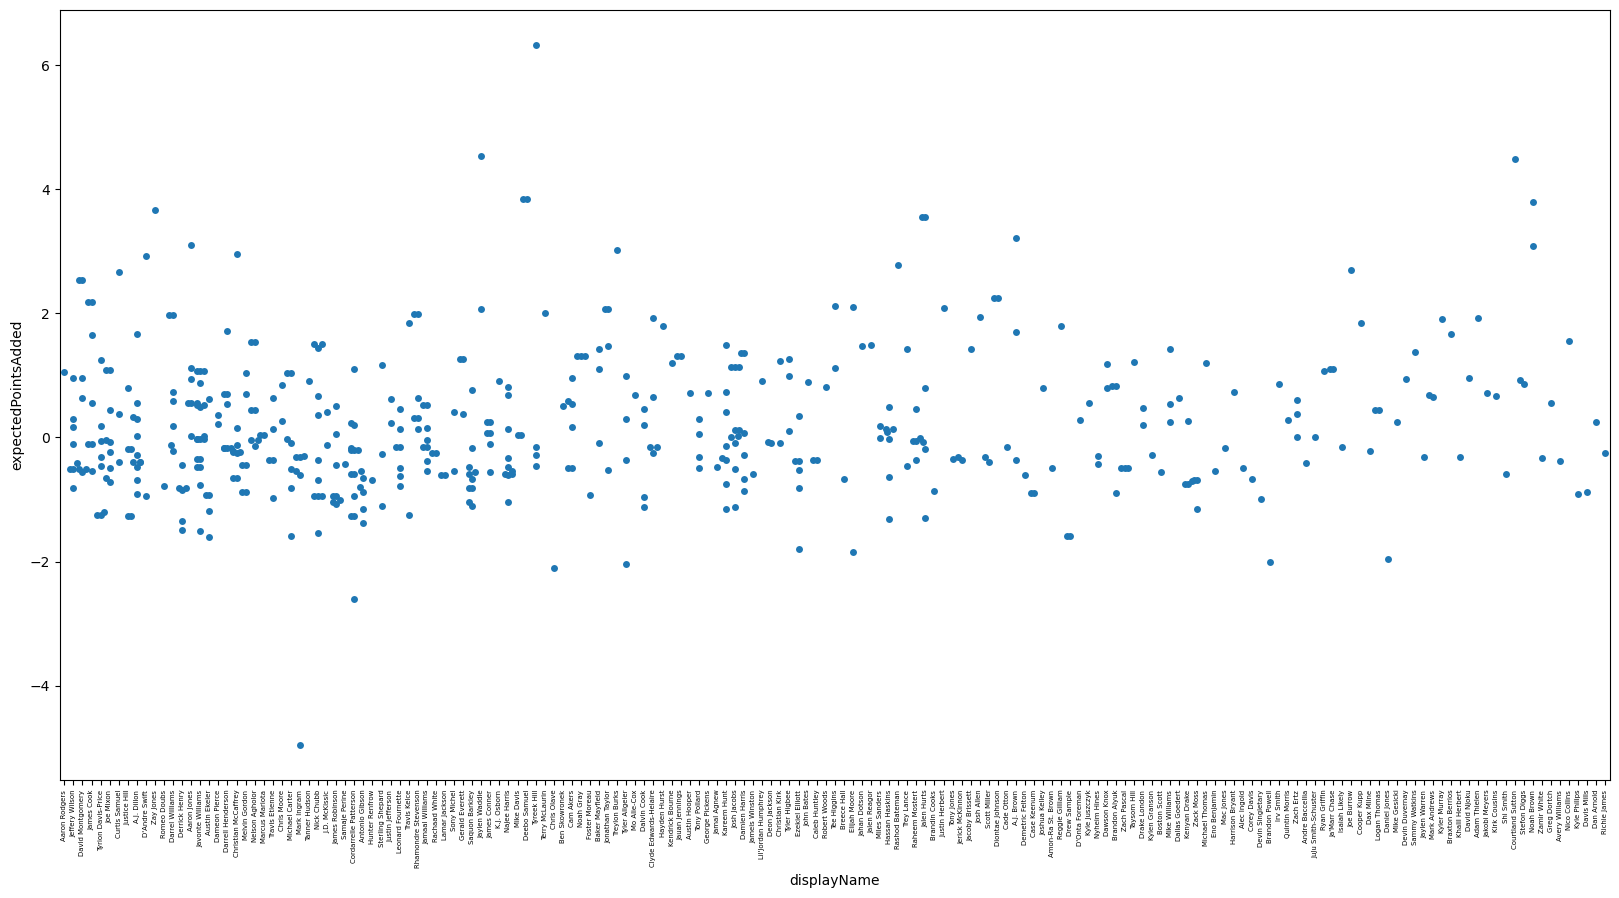

In [11]:
plt.figure(figsize=(20, 10))
sns.swarmplot(data = df, x = 'displayName', y = 'expectedPointsAdded')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

### Plots Using yardsToGo as y variable

/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 70.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:354

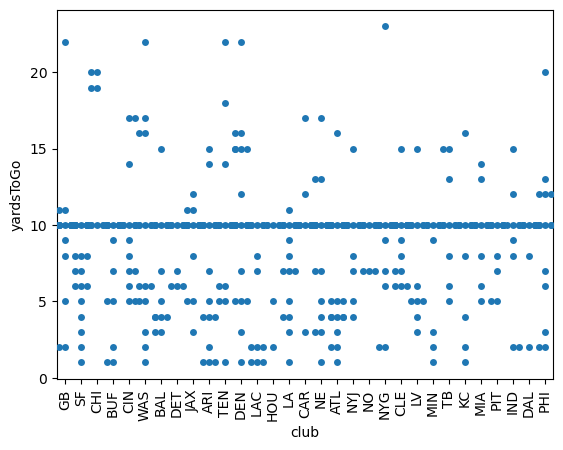

In [12]:
sns.swarmplot(data = df, x = 'club' , y = 'yardsToGo')
plt.xticks(rotation = 90)
plt.show()

/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 71.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/cyn/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:354

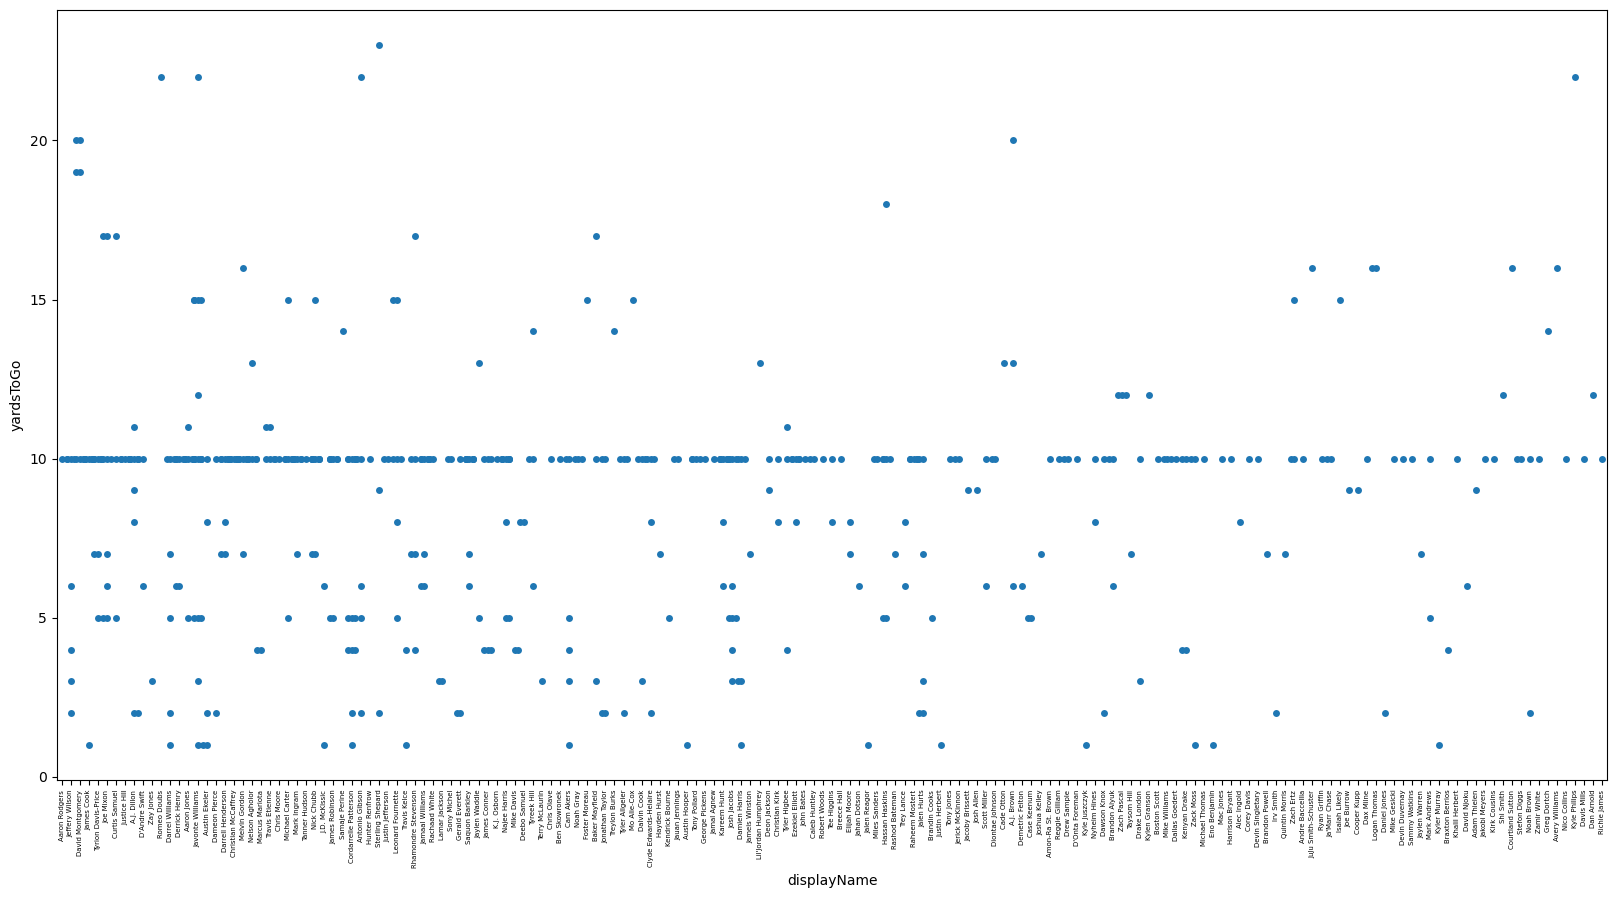

In [14]:
plt.figure(figsize=(20, 10))
sns.swarmplot(data = df, x = 'displayName', y = 'yardsToGo')
plt.xticks(rotation = 90, fontsize = 5)
plt.show()

# Scale the data

In [15]:
dataset_club_game = df.set_index(['club'])

/var/folders/1v/cty37wrs42196x0dzbz8j4jw0000gn/T/ipykernel_16009/2199462871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


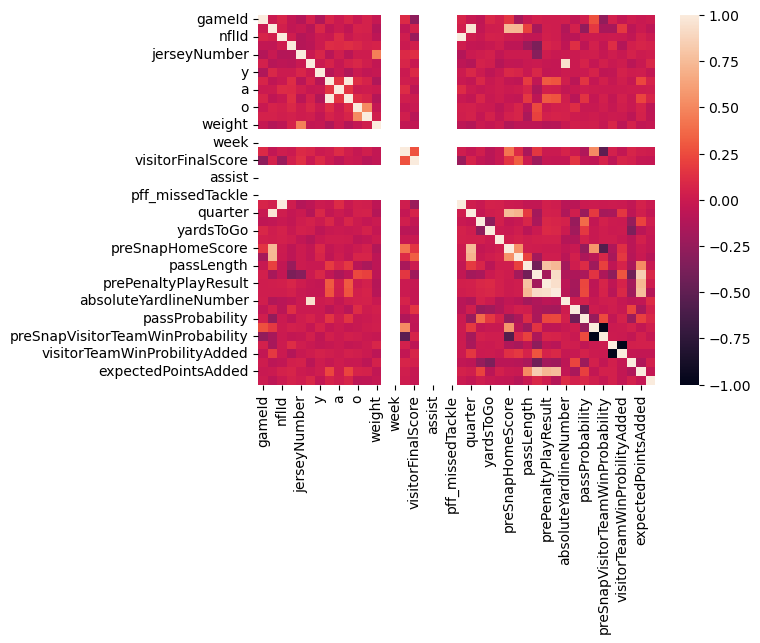

In [45]:
plt.subplots()
sns.heatmap(df.corr())
plt.show()

In [17]:
def scatterplot(dataframe, columns, ncol = None, figsize = (15, 8)):
    if ncol is None:
        ncol = len(columns)    
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'expectedPointsAdded', data= dataframe, alpha=0.5)
        ax.set(xlabel=col, ylabel='Expected Point Added')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [18]:
features = [i for i in df.columns if i not in ['expectedPointsAdded','gameId', 'nflId', 'club', 'displayName']]

TypeError: 'value' must be an instance of str or bytes, not a float

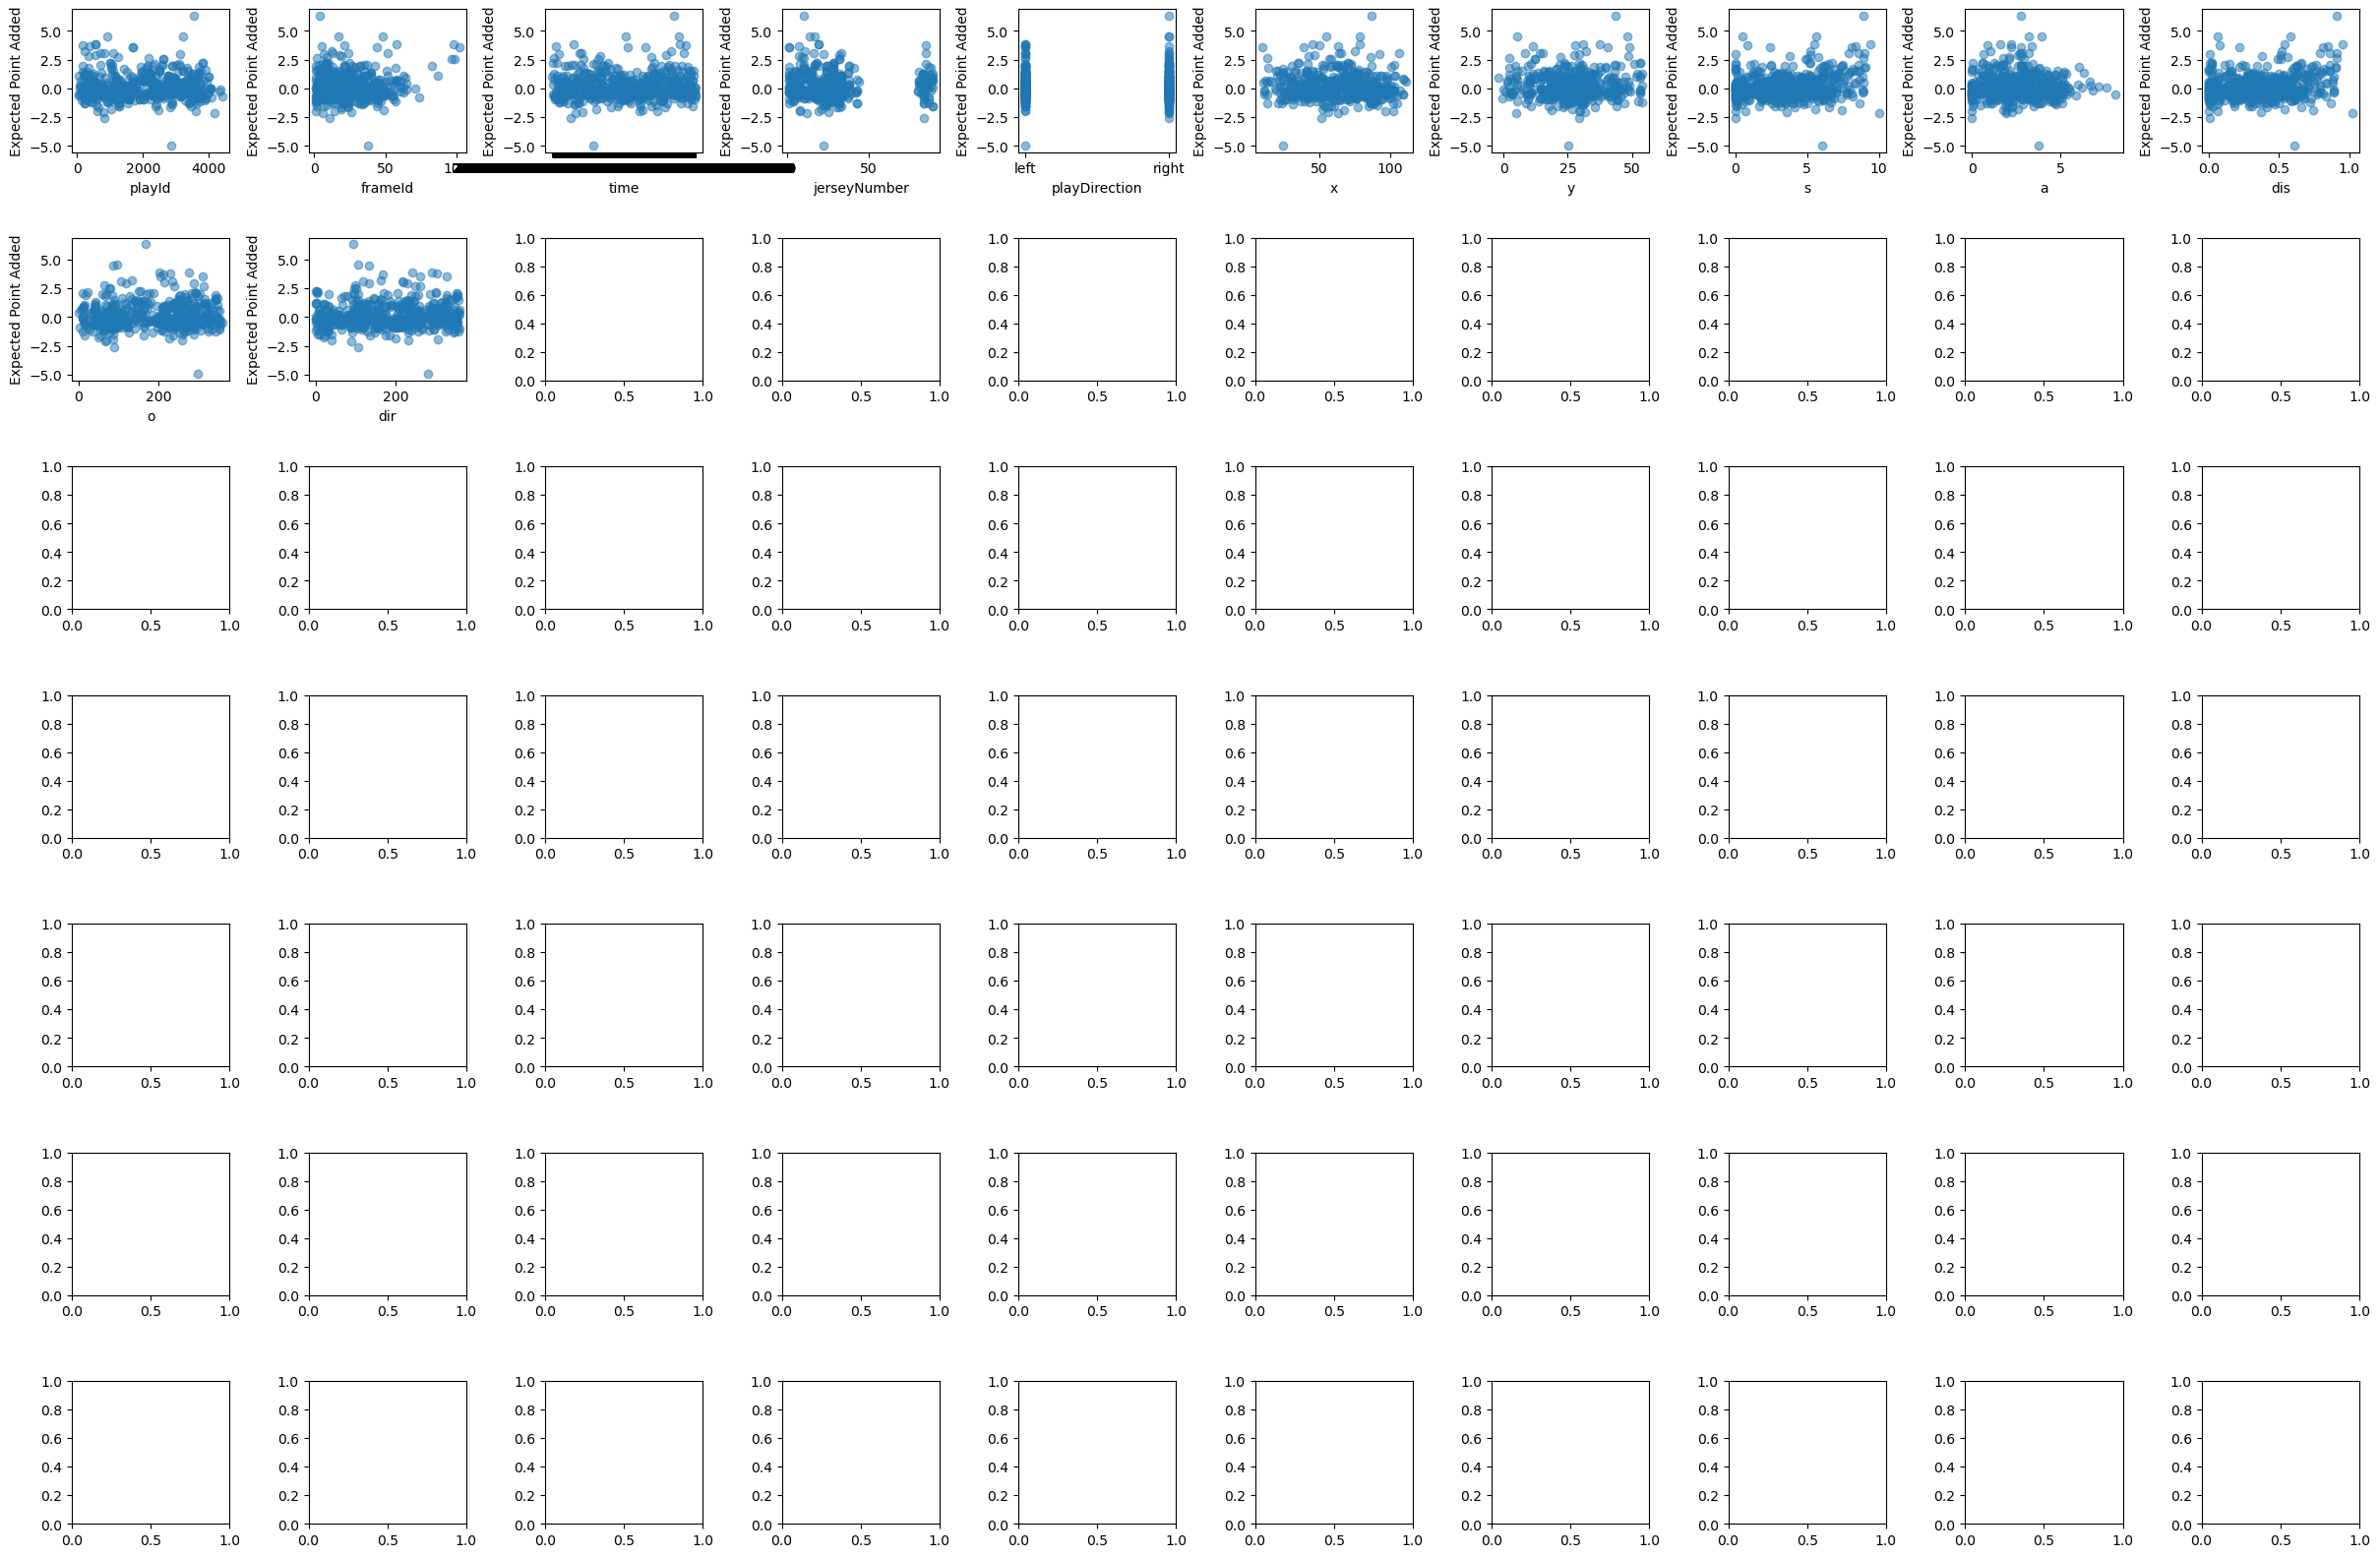

In [36]:
scatterplot(df, features, ncol = 10, figsize = (30, 20))

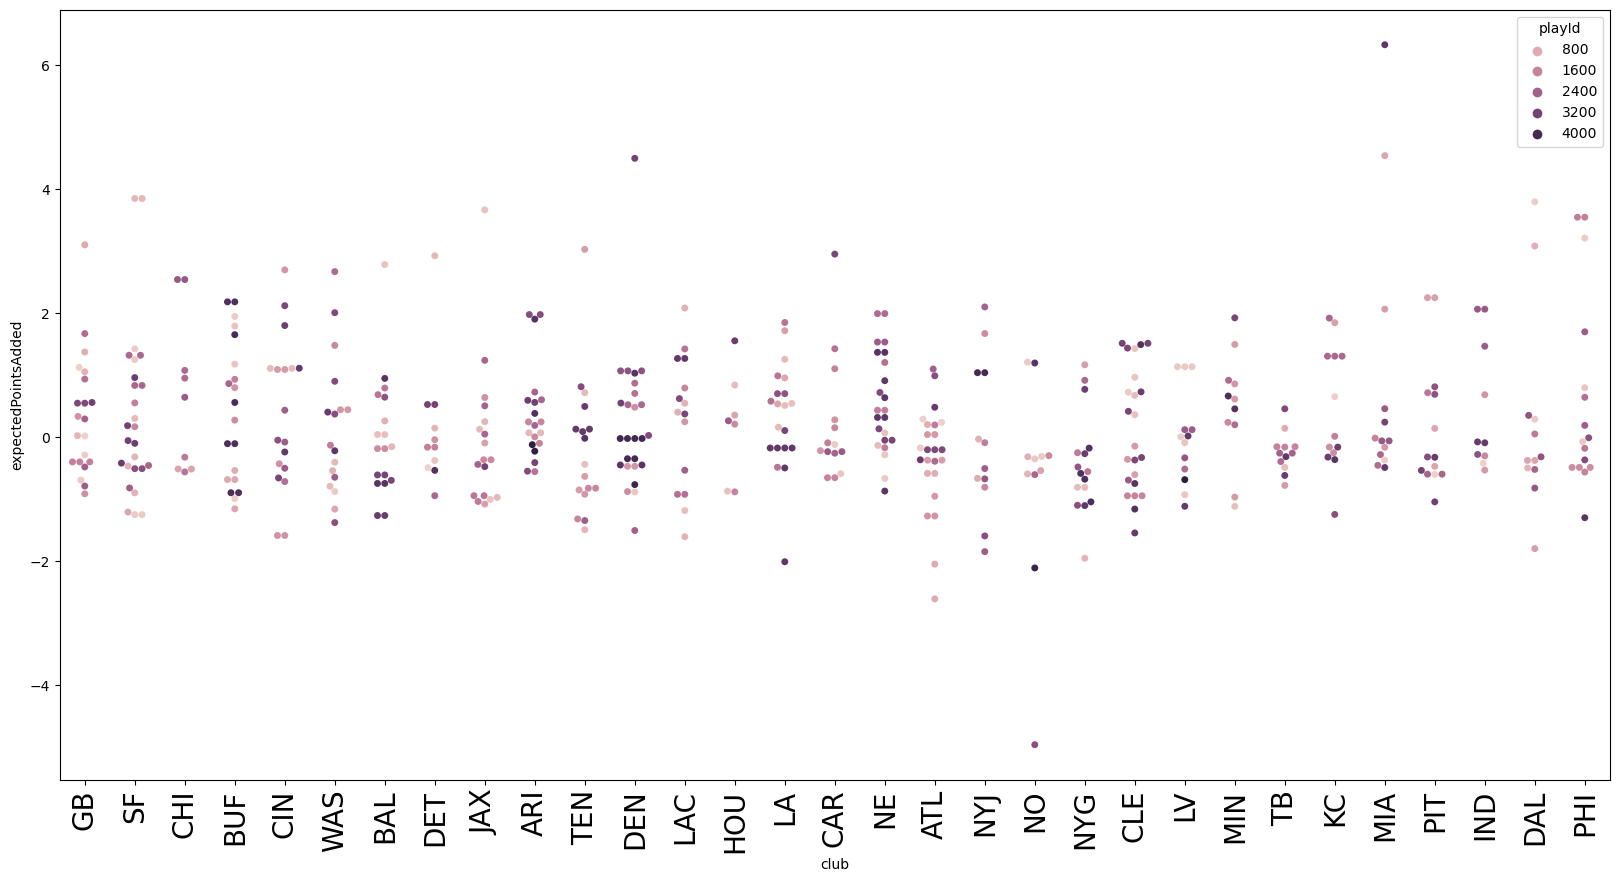

In [42]:
plt.figure(figsize=(20, 10))
sns.swarmplot(data = df, x = 'club', y = 'expectedPointsAdded', hue = 'playId')
plt.xticks(rotation=90, fontsize = 20)
plt.show()

In [ ]:
 # pick an obj. / solve part of the problem statement

For the next steps, I will focus on the variable playId to see how it influences the variable, expectedPointsAdded, to see if there are certain plays that will help a team more than other plays.